In [15]:
import pandas as pd

In [16]:
df1 = pd.read_csv("takehome_users.csv",encoding='latin-1')
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [18]:
df1.shape

(12000, 10)

In [19]:
df1["object_id"].unique().size

12000

In [20]:
df2 = pd.read_csv("takehome_user_engagement.csv")
df2

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [22]:
df2.shape

(207917, 3)

In [23]:
df1.rename(columns={'object_id':'user_id'},inplace=True)  #rename the column object_id into user_id, so it help during merging.
df3=pd.merge(df1,df2,on='user_id')

In [24]:
df3['creation_time'] = pd.to_datetime(df3['creation_time'])  #convert datetime to pandas.DateTime format
df3['time_stamp'] = pd.to_datetime(df3['time_stamp'])

In [25]:
df3

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1
...,...,...,...,...,...,...,...,...,...,...,...,...
207912,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,2013-09-06 06:14:15,1
207913,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,2013-01-15 18:28:37,1
207914,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,2014-04-27 12:45:16,1
207915,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,2012-06-02 11:55:59,1


In [26]:
#dir(df3["time_stamp"].dt)

In [27]:
df3["Year"]=df3["time_stamp"].dt.year   #create new Column "Year" by extracting the data from "time_stamp" column

In [28]:
df3["Week"]=df3["time_stamp"].dt.isocalendar().week    #create ne column "Week" by extracting the data from "time_stamp" column

In [31]:
adopted_user=df3.groupby(["user_id", "Year","Week"]).filter(lambda x : len(x)>=3)
#filter user_id who visited atleast 3 times in a week.
adopted_user

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited,Year,Week
7,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-02-03 03:45:04,1,2014,6
8,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-02-08 03:45:04,1,2014,6
9,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-02-09 03:45:04,1,2014,6
28,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013-02-26 22:08:03,1,2013,9
29,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013-03-01 22:08:03,1,2013,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207898,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,2014-05-23 11:04:47,1,2014,21
207899,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,2014-05-24 11:04:47,1,2014,21
207900,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,2014-05-26 11:04:47,1,2014,22
207901,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,2014-05-27 11:04:47,1,2014,22


(array([53901.,     0., 28605.,     0.,     0., 36248.,     0., 27236.,
            0., 14497.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

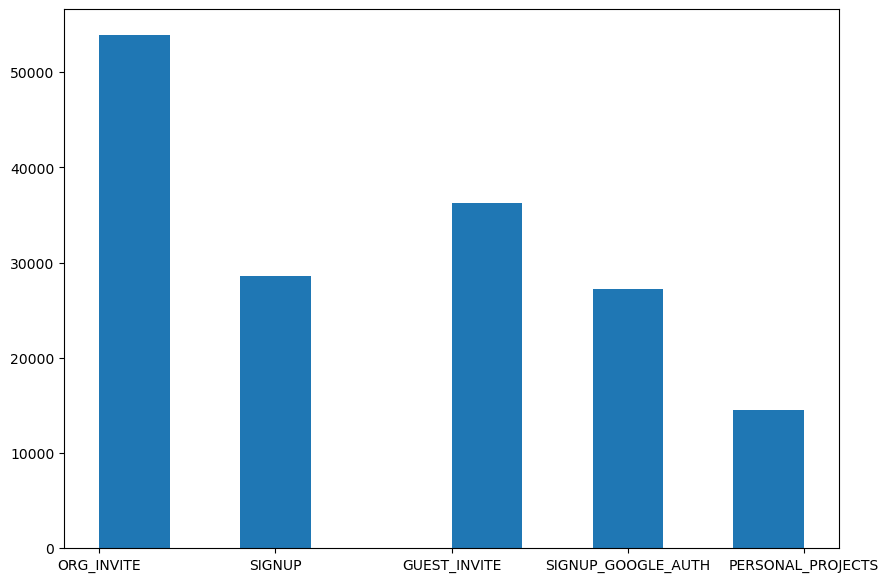

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
plt.hist(adopted_user["creation_source"])

### Conclusion

People who were introduced by ORG_INVITE visited product page more than 3 times in a week

(array([119340.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  41147.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

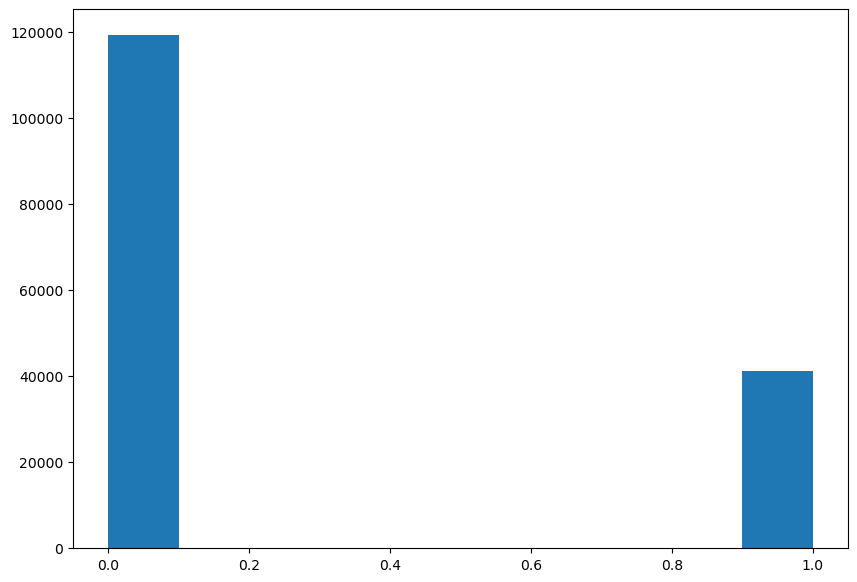

In [17]:
plt.figure(figsize = (10, 7))
plt.hist(adopted_user["opted_in_to_mailing_list"])

### Conclusion 

People who didn't opted for mailing_list visited more than 3 times in a week

(array([136141.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  24346.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

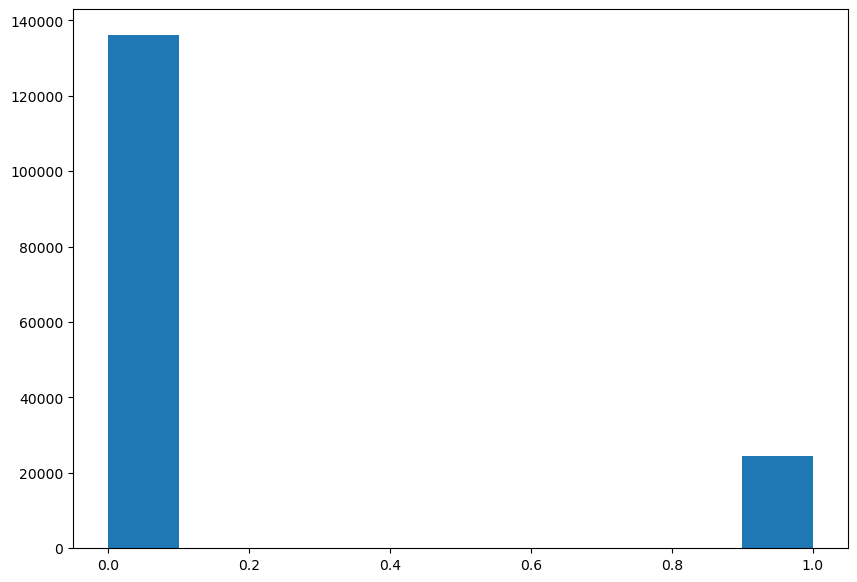

In [18]:
plt.figure(figsize = (10, 7))
plt.hist(adopted_user["enabled_for_marketing_drip"])

### Conclusion

People who hadn't enabled_for_marketing_drip visited more than 3 times in a week

(array([ 5325.,     0.,     0.,     0.,     0., 80678.,     0.,     0.,
            0., 74484.]),
 array([2012. , 2012.2, 2012.4, 2012.6, 2012.8, 2013. , 2013.2, 2013.4,
        2013.6, 2013.8, 2014. ]),
 <BarContainer object of 10 artists>)

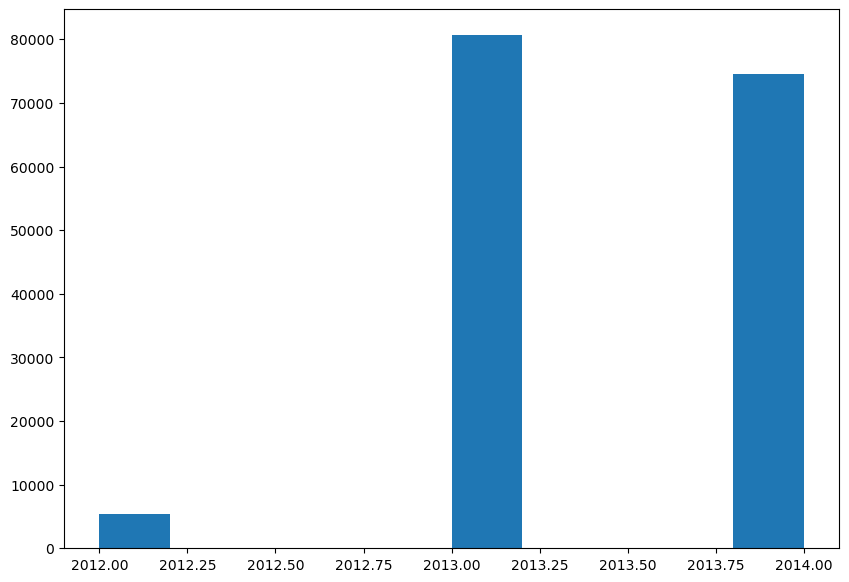

In [20]:
plt.figure(figsize = (10, 7))
plt.hist(adopted_user["Year"])

### Conclusion

People visited the product page more than 3 times in a week in the Year 2013 and 2014